In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft,fftfreq
data1 = loadmat('data_exp.mat')
data2 = loadmat('data_pred1.mat')
data3 = loadmat('data_pred2.mat')
F1 = data1['F']
F2 = data2['F']
F3 = data3['F']
displacement1 = data1['x'] 
displacement2 = data2['x'] 
displacement3 = data3['x'] 
import pandas as pd
F11 = pd.DataFrame(F1)
displacement11 = pd.DataFrame(displacement1)
#train_data = pd.concat([F11, displacement11], axis=1)
train_data = F1
F21 = pd.DataFrame(F2)
displacement21 = pd.DataFrame(displacement2)
F31 = pd.DataFrame(F3)
displacement31 = pd.DataFrame(displacement3)
import numpy as np
test_data = pd.concat([F21, F31], axis = 0)
real_data = pd.concat([displacement21, displacement31], axis = 0)
test_data = np.array(test_data)
real_data = np.array(real_data)
train_features = np.array(train_data, dtype=np.float32)
test_features = np.array(test_data, dtype=np.float32)
train_labels = np.array(
    displacement1, dtype=np.float32)
test_labels = np.array(
    real_data, dtype=np.float32)

In [2]:
X_raw = fft(train_features)
X1 = pd.DataFrame(X_raw.real)
X2 = pd.DataFrame(X_raw.imag)
X = pd.concat([X1, X2], axis = 1)
X = np.array(X, dtype = np.float32)

In [3]:
Y_raw = fft(train_labels)
Y1 = pd.DataFrame(Y_raw.real)
Y2 = pd.DataFrame(Y_raw.imag)
Y = pd.concat([Y1, Y2], axis = 1)
Y = np.array(Y, dtype = np.float32)

In [4]:
X_test_raw = fft(test_features)
X_test1 = pd.DataFrame(X_test_raw.real)
X_test2 = pd.DataFrame(X_test_raw.imag)
X_test = pd.concat([X_test1, X_test2], axis = 1)
X_test = np.array(X_test, dtype = np.float32)
Y_test_raw = fft(test_labels)
Y_test1 = pd.DataFrame(Y_test_raw.real)
Y_test2 = pd.DataFrame(Y_test_raw.imag)
Y_test = pd.concat([Y_test1, Y_test2], axis = 1)
Y_test = np.array(Y_test, dtype = np.float32)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dropout

model = Sequential()
model.add(Dropout(rate=0, input_shape=(2000,)))
#model.add(Dense(units=30, input_dim=2000))
model.add(Activation('tanh'))
model.add(Dense(units=800))
model.add(Activation('tanh'))
model.add(Dropout(0.7))
model.add(Dense(units=400))
model.add(Activation('tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=10))
model.add(Activation('tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=2000))
#model.add(Activation('tanh'))
model.summary()
model.compile(optimizer="adam", loss='mse')

history = model.fit(X,Y,epochs=800,validation_split=0.2)
y_pred = model.predict(X_test)
eval1 = model.evaluate(X_test, Y_test)
print(eval1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
activation (Activation)      (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               1600800   
_________________________________________________________________
activation_1 (Activation)    (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
activation_2 (Activation)    (None, 400)               0

3/3 [==============================] - 0s 11ms/step - loss: 3.3533e-05 - val_loss: 5.2803e-05
Epoch 60/800
3/3 [==============================] - 0s 11ms/step - loss: 3.0557e-05 - val_loss: 5.1877e-05
Epoch 61/800
3/3 [==============================] - 0s 12ms/step - loss: 3.0692e-05 - val_loss: 5.0884e-05
Epoch 62/800
3/3 [==============================] - 0s 11ms/step - loss: 2.8686e-05 - val_loss: 4.9815e-05
Epoch 63/800
3/3 [==============================] - 0s 11ms/step - loss: 2.8458e-05 - val_loss: 4.8716e-05
Epoch 64/800
3/3 [==============================] - 0s 11ms/step - loss: 3.1272e-05 - val_loss: 4.7594e-05
Epoch 65/800
3/3 [==============================] - 0s 11ms/step - loss: 2.8984e-05 - val_loss: 4.6568e-05
Epoch 66/800
3/3 [==============================] - 0s 11ms/step - loss: 2.9413e-05 - val_loss: 4.5748e-05
Epoch 67/800
3/3 [==============================] - 0s 11ms/step - loss: 2.7079e-05 - val_loss: 4.5155e-05
Epoch 68/800
3/3 [==============================] 

3/3 [==============================] - 0s 12ms/step - loss: 2.3126e-05 - val_loss: 2.9937e-05
Epoch 136/800
3/3 [==============================] - 0s 12ms/step - loss: 2.1943e-05 - val_loss: 3.0184e-05
Epoch 137/800
3/3 [==============================] - 0s 12ms/step - loss: 2.2058e-05 - val_loss: 3.0220e-05
Epoch 138/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0619e-05 - val_loss: 3.0127e-05
Epoch 139/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1616e-05 - val_loss: 2.9981e-05
Epoch 140/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9428e-05 - val_loss: 2.9928e-05
Epoch 141/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1028e-05 - val_loss: 2.9880e-05
Epoch 142/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1720e-05 - val_loss: 2.9764e-05
Epoch 143/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0843e-05 - val_loss: 2.9775e-05
Epoch 144/800
3/3 [=======================

Epoch 211/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0187e-05 - val_loss: 2.8315e-05
Epoch 212/800
3/3 [==============================] - 0s 14ms/step - loss: 2.1422e-05 - val_loss: 2.8453e-05
Epoch 213/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0039e-05 - val_loss: 2.8422e-05
Epoch 214/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0624e-05 - val_loss: 2.8446e-05
Epoch 215/800
3/3 [==============================] - 0s 15ms/step - loss: 2.3712e-05 - val_loss: 2.8544e-05
Epoch 216/800
3/3 [==============================] - 0s 14ms/step - loss: 2.1030e-05 - val_loss: 2.8610e-05
Epoch 217/800
3/3 [==============================] - 0s 16ms/step - loss: 2.1198e-05 - val_loss: 2.8699e-05
Epoch 218/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1448e-05 - val_loss: 2.8652e-05
Epoch 219/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9320e-05 - val_loss: 2.8598e-05
Epoch 220/800
3/3 [=========

Epoch 287/800
3/3 [==============================] - 0s 12ms/step - loss: 1.8822e-05 - val_loss: 2.8088e-05
Epoch 288/800
3/3 [==============================] - 0s 11ms/step - loss: 1.8390e-05 - val_loss: 2.7986e-05
Epoch 289/800
3/3 [==============================] - 0s 12ms/step - loss: 2.0968e-05 - val_loss: 2.8232e-05
Epoch 290/800
3/3 [==============================] - 0s 12ms/step - loss: 2.1350e-05 - val_loss: 2.8196e-05
Epoch 291/800
3/3 [==============================] - 0s 11ms/step - loss: 1.8822e-05 - val_loss: 2.7956e-05
Epoch 292/800
3/3 [==============================] - 0s 12ms/step - loss: 2.0912e-05 - val_loss: 2.7739e-05
Epoch 293/800
3/3 [==============================] - 0s 11ms/step - loss: 2.2284e-05 - val_loss: 2.7732e-05
Epoch 294/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0767e-05 - val_loss: 2.7986e-05
Epoch 295/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9907e-05 - val_loss: 2.8281e-05
Epoch 296/800
3/3 [=========

Epoch 363/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0663e-05 - val_loss: 2.8243e-05
Epoch 364/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9979e-05 - val_loss: 2.8380e-05
Epoch 365/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0582e-05 - val_loss: 2.8141e-05
Epoch 366/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1428e-05 - val_loss: 2.8095e-05
Epoch 367/800
3/3 [==============================] - 0s 14ms/step - loss: 1.9250e-05 - val_loss: 2.8123e-05
Epoch 368/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9881e-05 - val_loss: 2.7967e-05
Epoch 369/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0218e-05 - val_loss: 2.7588e-05
Epoch 370/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0487e-05 - val_loss: 2.7357e-05
Epoch 371/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0364e-05 - val_loss: 2.7328e-05
Epoch 372/800
3/3 [=========

Epoch 439/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1124e-05 - val_loss: 2.6778e-05
Epoch 440/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0082e-05 - val_loss: 2.6667e-05
Epoch 441/800
3/3 [==============================] - 0s 11ms/step - loss: 1.9369e-05 - val_loss: 2.6448e-05
Epoch 442/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9825e-05 - val_loss: 2.6434e-05
Epoch 443/800
3/3 [==============================] - 0s 11ms/step - loss: 2.3062e-05 - val_loss: 2.6723e-05
Epoch 444/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0445e-05 - val_loss: 2.6783e-05
Epoch 445/800
3/3 [==============================] - 0s 11ms/step - loss: 1.9743e-05 - val_loss: 2.7044e-05
Epoch 446/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9624e-05 - val_loss: 2.7420e-05
Epoch 447/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1203e-05 - val_loss: 2.7709e-05
Epoch 448/800
3/3 [=========

Epoch 515/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1503e-05 - val_loss: 2.6832e-05
Epoch 516/800
3/3 [==============================] - 0s 14ms/step - loss: 1.8891e-05 - val_loss: 2.6958e-05
Epoch 517/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1833e-05 - val_loss: 2.7034e-05
Epoch 518/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0264e-05 - val_loss: 2.7068e-05
Epoch 519/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0245e-05 - val_loss: 2.6939e-05
Epoch 520/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0623e-05 - val_loss: 2.6905e-05
Epoch 521/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9593e-05 - val_loss: 2.7160e-05
Epoch 522/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9949e-05 - val_loss: 2.7304e-05
Epoch 523/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1547e-05 - val_loss: 2.7617e-05
Epoch 524/800
3/3 [=========

Epoch 591/800
3/3 [==============================] - 0s 15ms/step - loss: 1.8389e-05 - val_loss: 2.6354e-05
Epoch 592/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9772e-05 - val_loss: 2.6374e-05
Epoch 593/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9481e-05 - val_loss: 2.6473e-05
Epoch 594/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9709e-05 - val_loss: 2.6790e-05
Epoch 595/800
3/3 [==============================] - 0s 14ms/step - loss: 1.8952e-05 - val_loss: 2.7145e-05
Epoch 596/800
3/3 [==============================] - 0s 14ms/step - loss: 2.1969e-05 - val_loss: 2.7187e-05
Epoch 597/800
3/3 [==============================] - 0s 16ms/step - loss: 1.8704e-05 - val_loss: 2.7212e-05
Epoch 598/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0315e-05 - val_loss: 2.7033e-05
Epoch 599/800
3/3 [==============================] - 0s 14ms/step - loss: 1.9664e-05 - val_loss: 2.6849e-05
Epoch 600/800
3/3 [=========

Epoch 667/800
3/3 [==============================] - 0s 12ms/step - loss: 2.1841e-05 - val_loss: 2.7326e-05
Epoch 668/800
3/3 [==============================] - 0s 12ms/step - loss: 1.8269e-05 - val_loss: 2.7091e-05
Epoch 669/800
3/3 [==============================] - 0s 11ms/step - loss: 1.9527e-05 - val_loss: 2.7088e-05
Epoch 670/800
3/3 [==============================] - 0s 11ms/step - loss: 2.0189e-05 - val_loss: 2.7250e-05
Epoch 671/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9707e-05 - val_loss: 2.7485e-05
Epoch 672/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9997e-05 - val_loss: 2.7675e-05
Epoch 673/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9205e-05 - val_loss: 2.7611e-05
Epoch 674/800
3/3 [==============================] - 0s 11ms/step - loss: 2.1188e-05 - val_loss: 2.7614e-05
Epoch 675/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9585e-05 - val_loss: 2.7434e-05
Epoch 676/800
3/3 [=========

Epoch 743/800
3/3 [==============================] - 0s 14ms/step - loss: 1.9425e-05 - val_loss: 2.6925e-05
Epoch 744/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9530e-05 - val_loss: 2.6552e-05
Epoch 745/800
3/3 [==============================] - 0s 15ms/step - loss: 1.8560e-05 - val_loss: 2.6305e-05
Epoch 746/800
3/3 [==============================] - 0s 14ms/step - loss: 1.7857e-05 - val_loss: 2.6240e-05
Epoch 747/800
3/3 [==============================] - 0s 14ms/step - loss: 1.9830e-05 - val_loss: 2.6152e-05
Epoch 748/800
3/3 [==============================] - 0s 15ms/step - loss: 2.1251e-05 - val_loss: 2.6230e-05
Epoch 749/800
3/3 [==============================] - 0s 15ms/step - loss: 2.0609e-05 - val_loss: 2.6353e-05
Epoch 750/800
3/3 [==============================] - 0s 15ms/step - loss: 1.7851e-05 - val_loss: 2.6389e-05
Epoch 751/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9779e-05 - val_loss: 2.6610e-05
Epoch 752/800
3/3 [=========

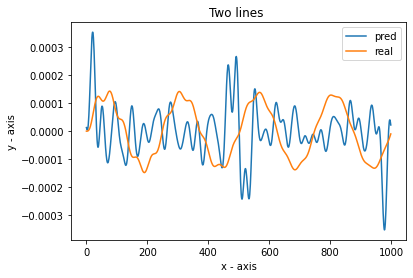

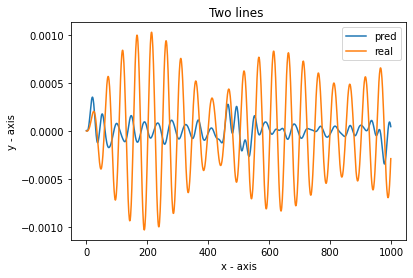

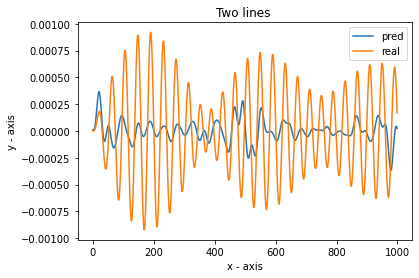

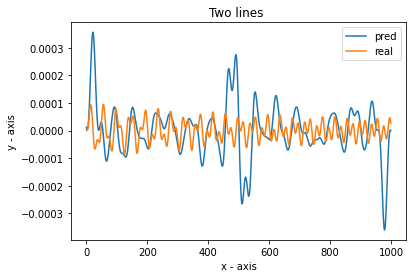

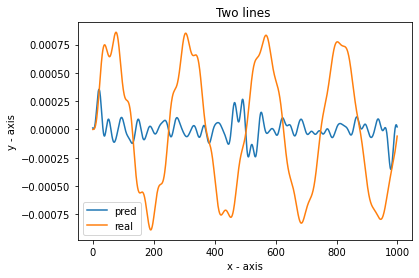

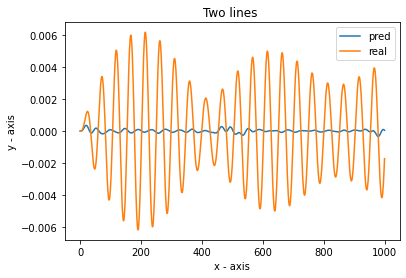

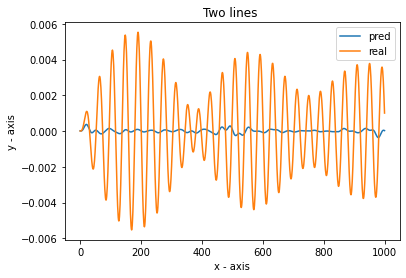

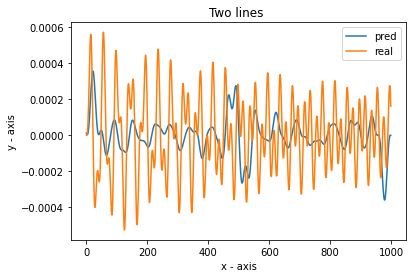

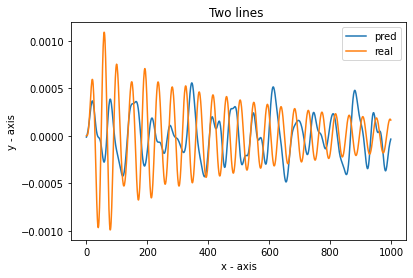

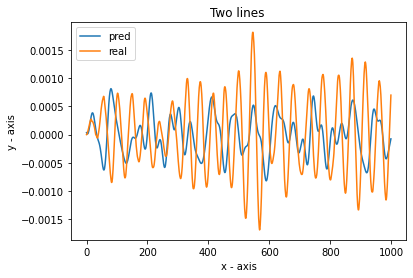

In [6]:
for i in range(10):
    y1 = y_pred[i]
    y2 = Y_test[i]

    y11 = y1[:1000]
    y12 = y1[1000:]
    y21 = y2[:1000]
    y22 = y2[1000:]
    y_pred_final = y11 + 1j*y12
    y_test_final = y21 + 1j*y22
    y_pred_final = ifft(y_pred_final).real
    y_test_final = test_labels[i]

    plt.plot(y_pred_final, label = "pred")

# line 2 points

# plotting the line 2 points

    plt.plot(y_test_final, label = "real")

# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

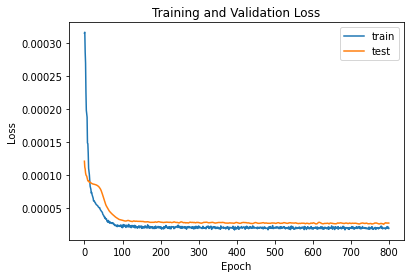

In [7]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()